In [2]:
####################
## Import Library ##
####################
import pandas as pd
import numpy as np
# import scipy.stats as stats
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#############################
## Load Files and variables##
#############################
fpath = "./"#D:/KDB/work/0.자습/python/noise_landcover/"
filename = "noise_landcover_buffer50m.csv"

# data description
# - columns : 
# 0 / FID
# 1 / Location
# 2 ~ 3 / x,y coordinates
# 4 ~ 5 / noise
# 6 ~ 49 / landcover
# 50 ~ 58 / zoning district
# 59 / DEM
data = pd.read_csv(fpath+filename, encoding='utf-8')

###################
## Preprocessing ##
###################

def extractNoise(noiseType, percent):
    ## function extractNoise(
    #   noiseType   :   string
    #   percent     :   string
    # )
    ## Arguments
    # noiseType : 
    # 'avg_daytime', 'avg_night'
    # percent :
    # '25%', '75%'
    var1 = data.loc[:, noiseType]
    condition = var1.describe().loc[percent]
    if percent == '25%':
        conditionOutput = data.loc[var1>=condition]
    elif percent == '75%':
        conditionOutput = data.loc[var1<=condition]
    return conditionOutput


# High & Low Noise at Daytime/Night
highNoiseAvgDaytime = extractNoise('avg_daytime', '75%')
lowNoiseAvgDaytime = extractNoise('avg_daytime', '25%')
highNoiseAvgNight = extractNoise('avg_night', '75%')
lowNoiseAvgNight = extractNoise('avg_night', '25%')


    FID   Location            X            Y  avg_daytime  avg_night   LC111  \
3     4  부산하나한의원 앞  389583.7114  288453.8779       59.424     54.697  2281.0   
7     8    창원삼화페인트  350023.1277  295887.9266       62.861     57.139  2738.0   
11   12  울산패밀리 아파트  420409.8889  330038.1847       62.710     57.387   486.0   
24   25    제주동여중입구  157194.0000  101091.0000       64.558     60.937   379.0   
26   27  광주봉선1로 63  191673.0000  281281.0000       62.654     57.745  1693.0   

     LC112  LC121   LC131  ...  UQB100  UQA320  UQA430  UQC001  UQC300  \
3      NaN    NaN  2290.0  ...     NaN     NaN     NaN     NaN     NaN   
7      NaN    NaN  1568.0  ...     NaN     NaN     NaN     NaN     NaN   
11  1429.0    NaN   376.0  ...     NaN     NaN     NaN     NaN     NaN   
24   568.0    NaN   301.0  ...     NaN     NaN   603.0     NaN     NaN   
26     NaN    NaN  3012.0  ...     NaN     NaN     NaN     NaN     NaN   

    UQA220  UQB200  UQD001   UQA122        DEM  
3      NaN     NaN     Na

In [6]:
##########################
## Statistical Analysis ##
##########################
## Correlation - Only Coefficient...Not p-value!!!
corrHighNoiseAvgDaytime = highNoiseAvgDaytime.iloc[4:,4:].corr(method='pearson').iloc[:,0:2]
corrLowNoiseAvgDaytime = lowNoiseAvgDaytime.iloc[4:,4:].corr(method='pearson').iloc[:,0:2]
corrHighNoiseAvgNight = highNoiseAvgNight.iloc[4:,4:].corr(method='pearson').iloc[:,0:2]
corrLowNoiseAvgNight = lowNoiseAvgNight.iloc[4:,4:].corr(method='pearson').iloc[:,0:2]

corrNoiseLandCover = pd.concat([corrHighNoiseAvgDaytime, corrLowNoiseAvgDaytime, corrHighNoiseAvgNight, corrLowNoiseAvgNight], axis=1)
corrNoiseLandCover = corrNoiseLandCover.iloc[2:, [0,2,5,7]]
corrNoiseLandCover.columns = ['highDaytime', 'lowDaytime', 'highNight', 'lowNight']

## Export output to csv file
#corrNoiseLandCover.to_csv('./correlation_Noise_Landcover.csv', encoding='utf-8-sig')


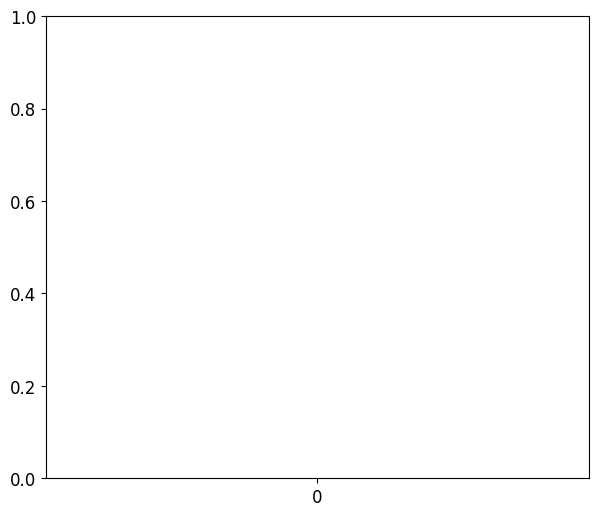

In [146]:
###############################
## Exploratory data analysis ##
###############################
# box plot (noise ~ landcover)
plt.figure(figsize=(7,6))
# test1 = highNoiseAvgDaytime.iloc[:,2]
# test2 = test1[~np.isnan(test1)]
# plt.boxplot(test2)
# plt.show()

# data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
# data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
# data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)
test1 = highNoiseAvgDaytime.loc[:,'LC111']
data1 = test1[~np.isnan(test1)]
test2 = highNoiseAvgNight.loc[:,'LC111']
data2 = test2[~np.isnan(test2)]
test3 = lowNoiseAvgDaytime.loc[:,'LC111']
data3 = test3[~np.isnan(test3)]
cdf = pd.concat([data1, data2, data3])
# mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
# print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

ax = sns.boxplot(by=cdf)
plt.show()